Problem 1:

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import  _get_covariance, anova_lm


In [3]:
data=pd.read_csv('C:\\Users\\Suga\\Documents\\Great Learning\\Advanced Statistics\\Project\\Fever.csv')
data.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [4]:
data.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [5]:
data['A'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
data['B'].unique()

array([1, 2, 3], dtype=int64)

In [20]:
data['A']=pd.Categorical(data['A'])
data['A'].dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [21]:
data['B']=pd.Categorical(data['B'])
data['B'].dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


<b> Q1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu] </b>

For one way ANOVA for the variable 'A',

The  null and alternate hypothesis are shown as below:
Null Hypothesis : H0= xbar_A1 = xbar_A2 = xbar_A3      # the relief effect of three levels of A are equal
Alternate Hypothesis : HA= xbar_A1 != xbar_A2 != xbar_A3    # the relief effect of three levels of A are not equal


For one way ANOVA for the variable 'B',

The  null and alternate hypothesis are shown as below:
Null Hypothesis : H0= xbar_B1 = xbar_B2 = xbar_B3      # the relief effect of three levels of A are equal
Alternate Hypothesis : HA= xbar_B1 != xbar_B2 != xbar_B3    # the relief effect of three levels of A are not equal


<b> Q1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.</b>

Step 1: define  null and alternate hypothesis:
H0= xbar_A1 = xbar_A2 = xbar_A3      # the relief effect of three levels of A are equal
HA= xbar_A1 != xbar_A2 != xbar_A3    # the relief effect of three levels of A are not equal

Step 2: decide the significance level
Here, we select  𝛼  = 0.05.

Step 3: We create anova table as below by creating ols model with given dataset


In [25]:
formula='Relief ~ C(A)'
model=ols(formula,data).fit()
anova_table=anova_lm(model)
print(anova_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Step 4: p value is less than 0.05. 

<b> Hence the null hypothesis is rejected and states that the three levels of 'A' are not equal i.e. there is difference in relief by three differernt levels of the ingredient(variable) 'A' </b>

<b> Q1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results. </b>

Step 1: define  null and alternate hypothesis:
H0= xbar_B1 = xbar_B2 = xbar_B3         # the relief effect of three levels of B are equal
HA= xbar_B1 != xbar_B2 != xbar_B3       # the relief effect of three levels of B are not equal

Step 2: decide the significance level
Here, we select  𝛼  = 0.05.

Step 3: We create anova table as below by creating ols model with given dataset


In [26]:
formula='Relief ~ C(B)'
model=ols(formula,data).fit()
anova_table=anova_lm(model)
print(anova_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Step 4: p value is less than 0.05. 

<b> Hence the null hypothesis is rejected and states that the three levels of 'B' are not equal i.e. there is difference in relief by three differernt levels of the ingredient(variable) 'B' </b>

<b> Q1.4) Analyse the effects of one variable on another with the help of an interaction plot.
What is the interaction between the two treatments?
[hint: use the ‘pointplot’ function from the ‘seaborn’ function]` </b>

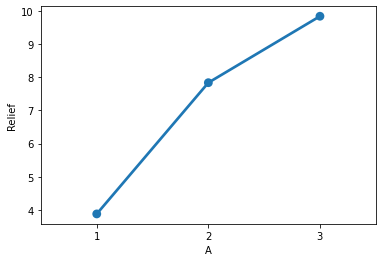

In [33]:
sns.pointplot(x=data['A'], y=data['Relief'],ci=None)

In [ ]:
The variable 'A' alone has the significant impact on Relief. When the level of A increases, the relief duration is decreased.

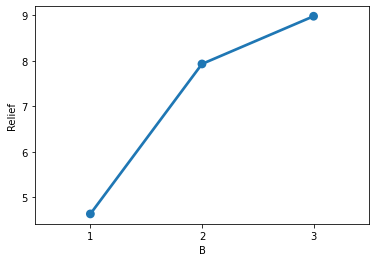

In [34]:
sns.pointplot(x=data['B'], y=data['Relief'],ci=None)

In [ ]:
The variable 'B' alone has the significant impact on Relief. When the level of B increases, the relief duration is decreased.

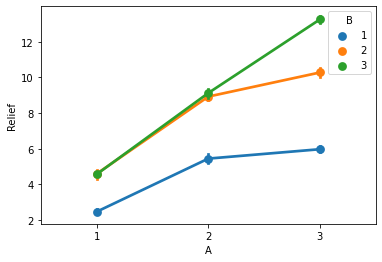

In [30]:
sns.pointplot(x=data['A'],y=data['Relief'],hue=data['B'])

From the above interaction plot, both the levels of A and B have the interaction effect since they are not parallel. Below are the inferences given:

1.The level 1 of  both ingredient 'A' and  ingredient B has the fastest relief compared to other combination of levels. 
2.The lower the levels of A and B, sooner the relief
3.The moderate level of A and level 2 and 3 of B have the better relief
4.The higher the levels of A and B, farther the relief
5.The difference between the levels of B at lower level of A is (around 2 hrs(fast relief)) less than 
the difference between the levels of B at higher level of A i.e, around 6 hrs (slow relief)
6.The levels of A has more effect on Relief in level 2 and 3 of B, thus it clearly shows the interaction exists between A and B.



<b> Q1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results. </b>

In [12]:
formula='Relief ~ C(A) + C(B) + C(A):C(B)'
model=ols(formula,data).fit()
anova_table=anova_lm(model)
print(anova_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


<b> Here p value of A, B and interaction of A and B is less than alpha (0.05). Hence we can reject the null hypothesis and states that the different levels of A,  the different levels of B and the interaction between the levels of A and B do have statistically significant impact on Relief. </b>

<b> Q1.6) Mention the business implications of performing ANOVA for this particular case study.</b>

To identify the effect of ingredients in a new compound for the relief of hay fever, we have used ANOVA approach here.

By performing ANOVA on this case study, 

we are able to state that the different levels of A,  the different levels of B and the interaction between the levels of A and B do have the statistically significant impact on Relief of Hay Fever.

To add in detail,

The level 1 of  both ingredient 'A' and  ingredient B have the fastest relief compared to other combination of levels. 

The lower the levels of A and B, sooner the relief
The moderate level of A and level 2 and 3 of B have the better relief
The higher the levels of A and B, farther the relief

The difference between the levels of B at lower level of A is (around 2 hrs(fast relief)) less than the difference between the levels of B at higher level of A i.e, around 6 hrs (slow relief)

The levels of A has more effect on Relief in level 2 and 3 of B, thus it clearly shows the interaction exists between A and B.

These are the insights we are able to attain by performing ANOVA for this particular case study.